In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt

**File Reading**

In [2]:
base_dir = os.getenv("BASE_DIR")

file_path = os.path.join(base_dir, "data/raw/heloc_dataset_v1.csv")

try: 
    data_frame = pd.read_csv(file_path,sep=",")
except FileNotFoundError as e:
    print(f"Exception during reading the file {file_path}. Have you set the base dir in the .env file? {e}")

**Boxplots per Feature**

In [3]:
print(str(data_frame.columns.values))

['RiskPerformance' 'ExternalRiskEstimate' 'MSinceOldestTradeOpen'
 'MSinceMostRecentTradeOpen' 'AverageMInFile' 'NumSatisfactoryTrades'
 'NumTrades60Ever2DerogPubRec' 'NumTrades90Ever2DerogPubRec'
 'PercentTradesNeverDelq' 'MSinceMostRecentDelq'
 'MaxDelq2PublicRecLast12M' 'MaxDelqEver' 'NumTotalTrades'
 'NumTradesOpeninLast12M' 'PercentInstallTrades'
 'MSinceMostRecentInqexcl7days' 'NumInqLast6M' 'NumInqLast6Mexcl7days'
 'NetFractionRevolvingBurden' 'NetFractionInstallBurden'
 'NumRevolvingTradesWBalance' 'NumInstallTradesWBalance'
 'NumBank2NatlTradesWHighUtilization' 'PercentTradesWBalance']


<Figure size 800x600 with 0 Axes>

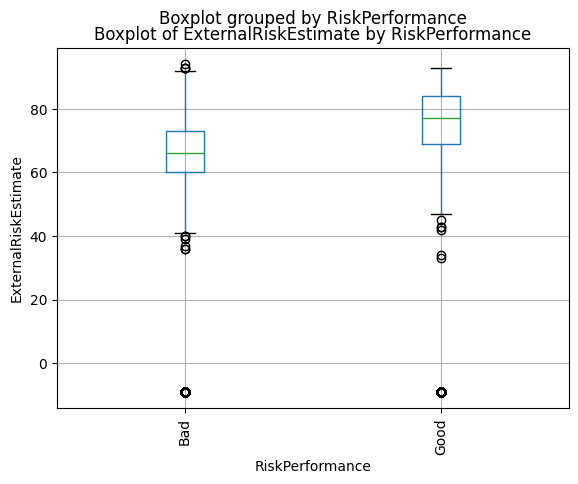

<Figure size 800x600 with 0 Axes>

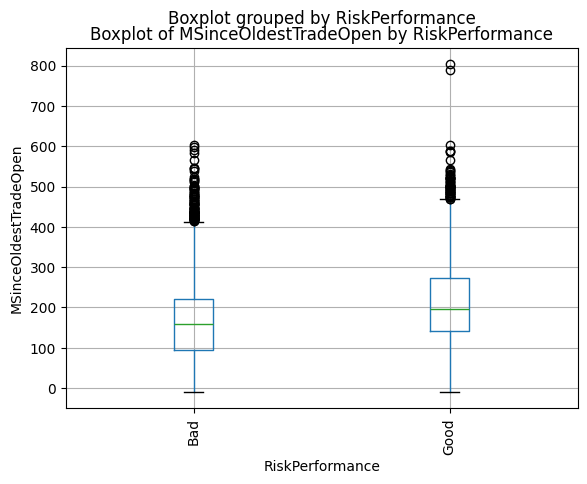

<Figure size 800x600 with 0 Axes>

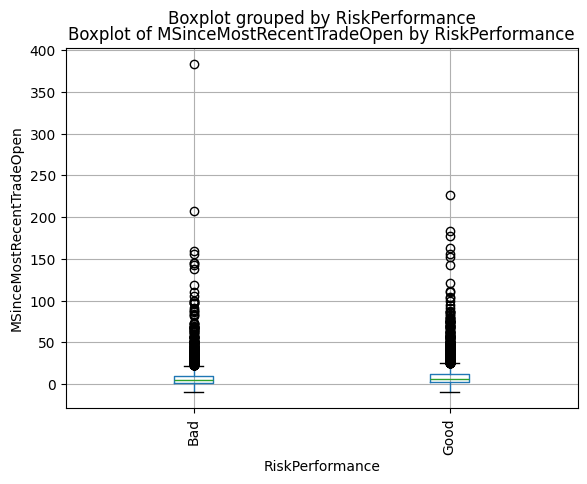

<Figure size 800x600 with 0 Axes>

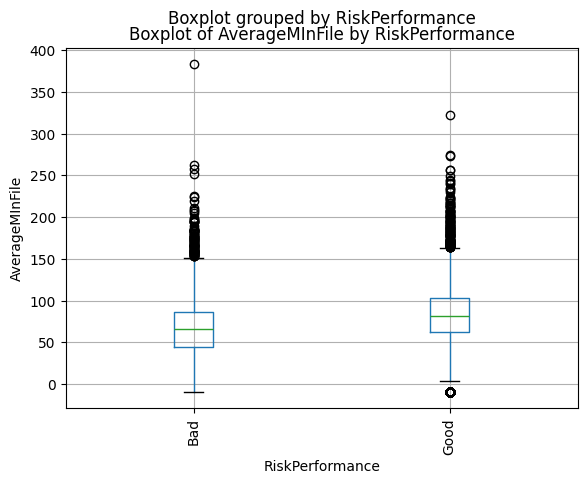

<Figure size 800x600 with 0 Axes>

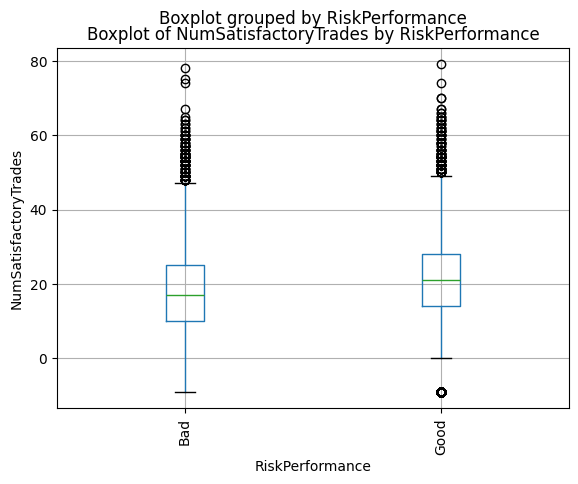

<Figure size 800x600 with 0 Axes>

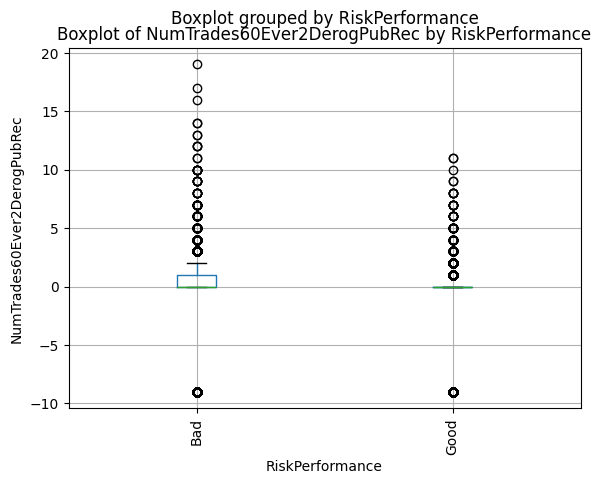

<Figure size 800x600 with 0 Axes>

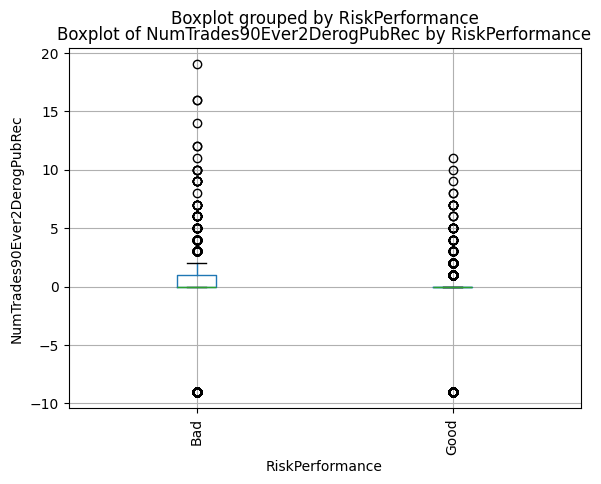

<Figure size 800x600 with 0 Axes>

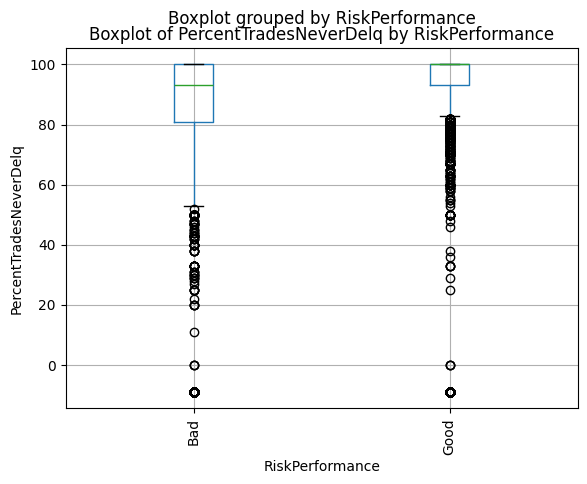

<Figure size 800x600 with 0 Axes>

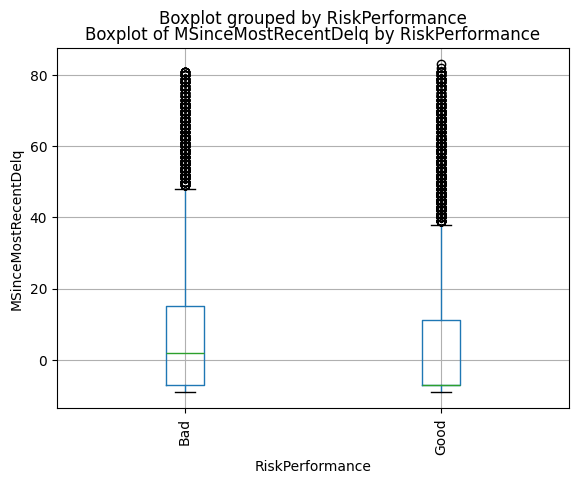

<Figure size 800x600 with 0 Axes>

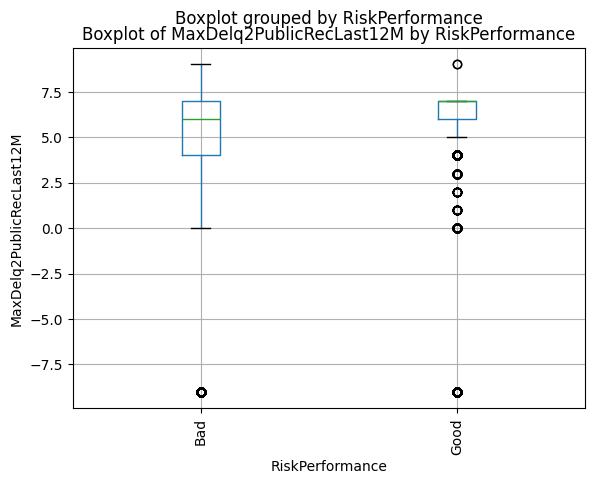

<Figure size 800x600 with 0 Axes>

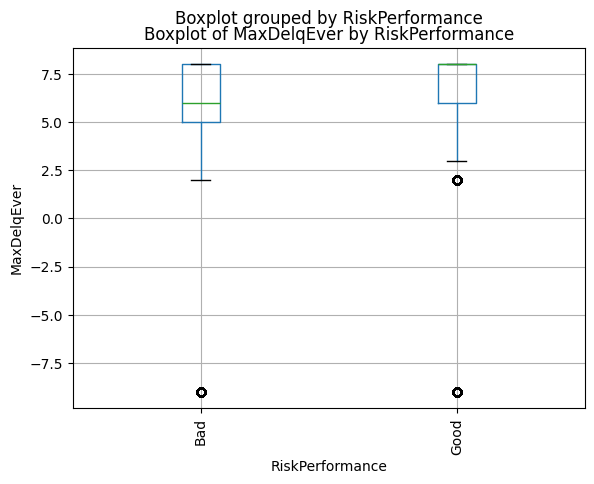

<Figure size 800x600 with 0 Axes>

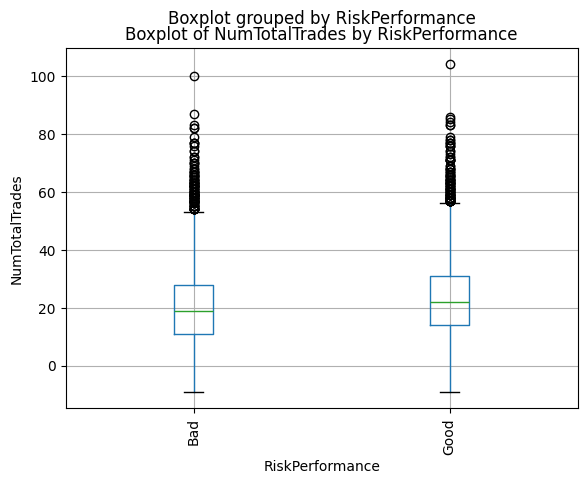

<Figure size 800x600 with 0 Axes>

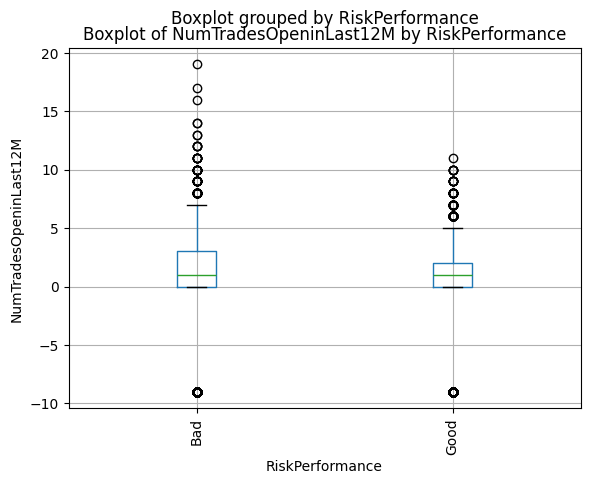

<Figure size 800x600 with 0 Axes>

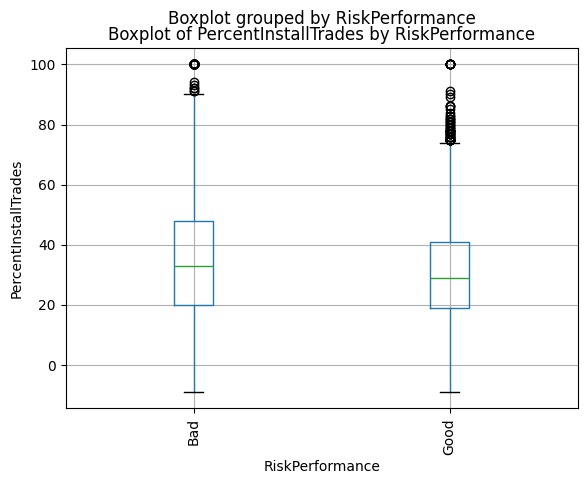

<Figure size 800x600 with 0 Axes>

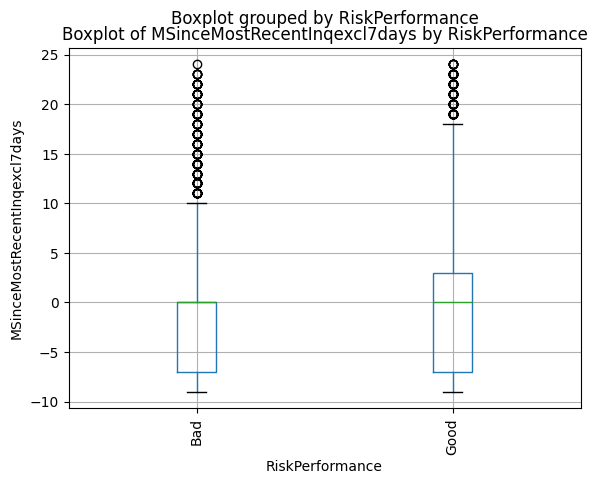

<Figure size 800x600 with 0 Axes>

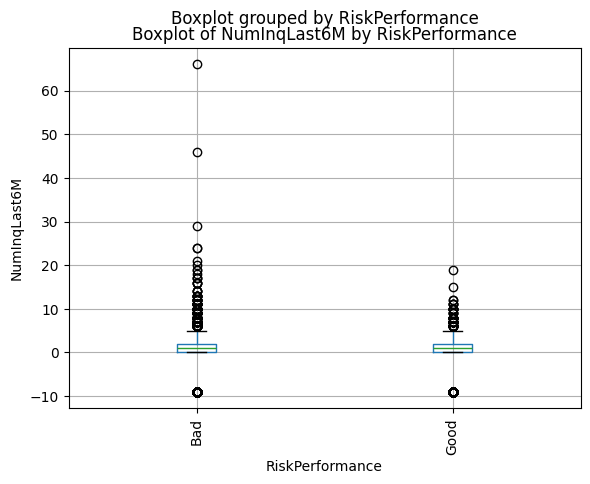

<Figure size 800x600 with 0 Axes>

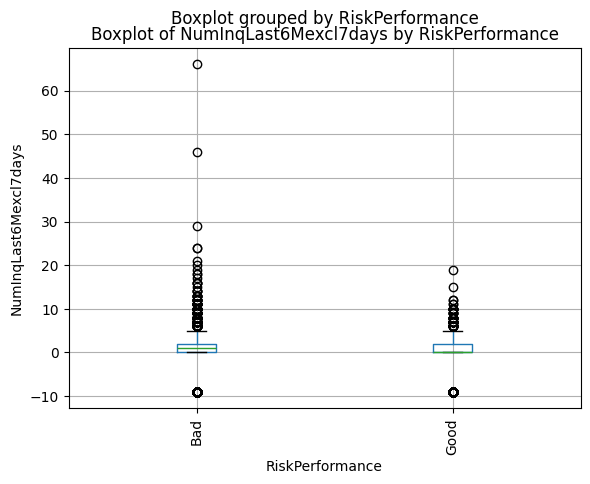

<Figure size 800x600 with 0 Axes>

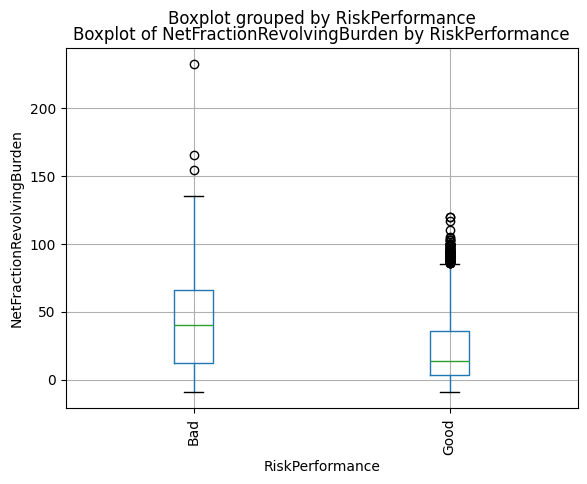

<Figure size 800x600 with 0 Axes>

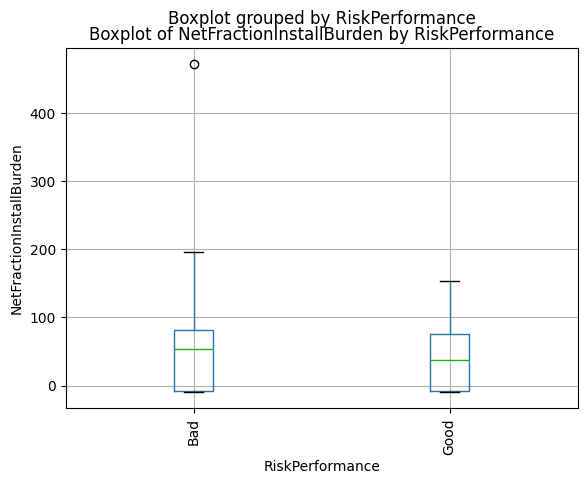

<Figure size 800x600 with 0 Axes>

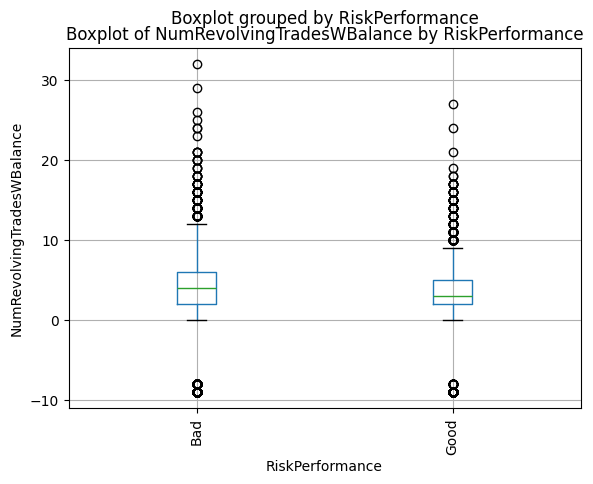

<Figure size 800x600 with 0 Axes>

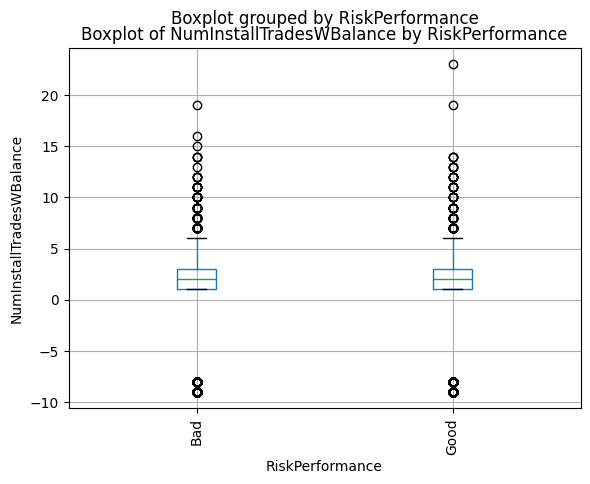

<Figure size 800x600 with 0 Axes>

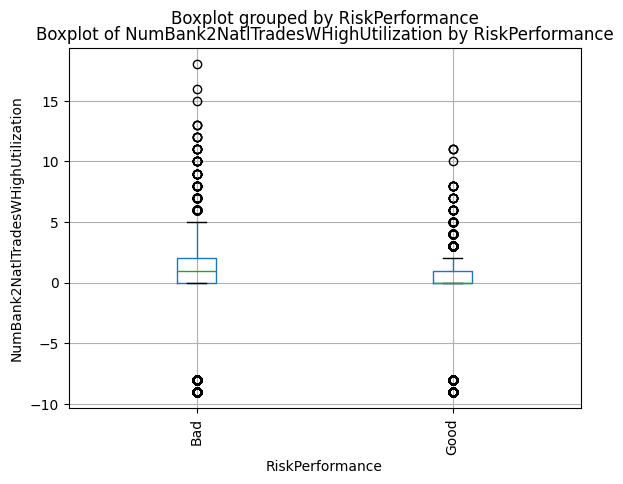

<Figure size 800x600 with 0 Axes>

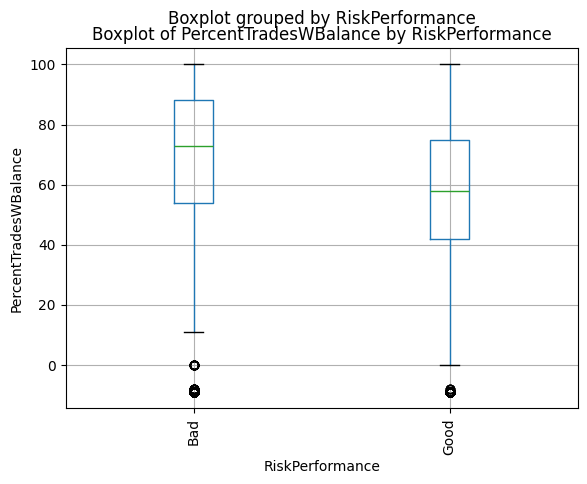

In [4]:
features = data_frame.columns[1:]  # Exclude the first column (RiskPerformance)

# Plot each feature separately
for feature in features:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    data_frame.boxplot(column=feature, by='RiskPerformance')
    plt.ylabel(feature)  # Set the y-axis label as the feature name
    plt.title(f'Boxplot of {feature} by RiskPerformance')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()

Interesting observation: there are 588 rows where all feature values are -9. We remove them from the dataset.

In [8]:
data_frame_outliers = data_frame[(data_frame.drop(columns='RiskPerformance') == -9).all(axis=1)]

data_frame_without_outliers = data_frame[(data_frame.drop(columns='RiskPerformance') != -9).all(axis=1)]
data_frame_without_outliers.to_csv(os.path.join(base_dir, "data/raw/heloc_dataset_cleaned.csv"), index=False)

<Figure size 800x600 with 0 Axes>

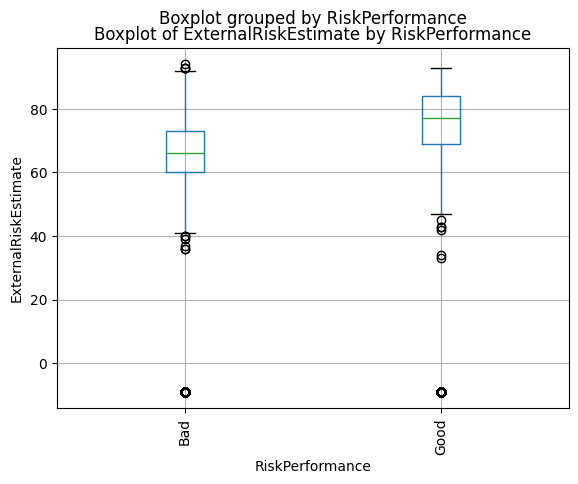

<Figure size 800x600 with 0 Axes>

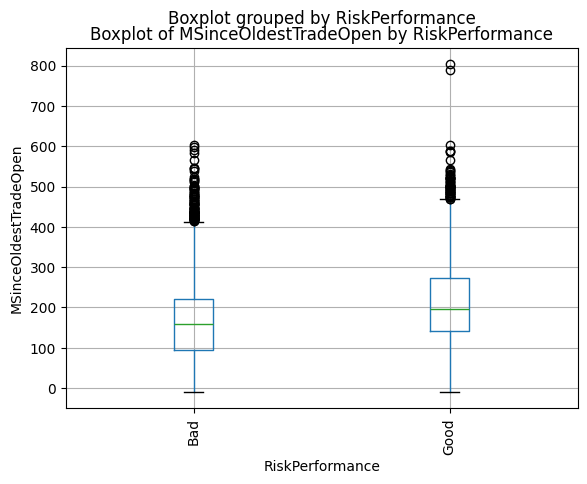

<Figure size 800x600 with 0 Axes>

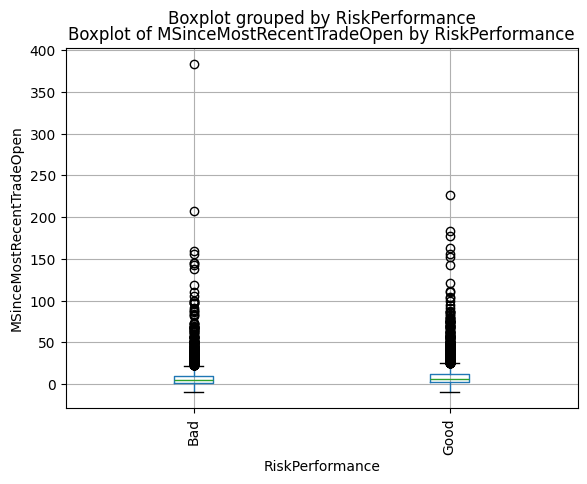

<Figure size 800x600 with 0 Axes>

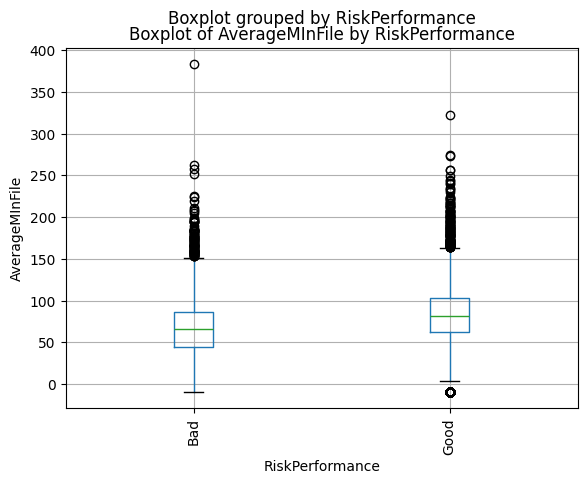

<Figure size 800x600 with 0 Axes>

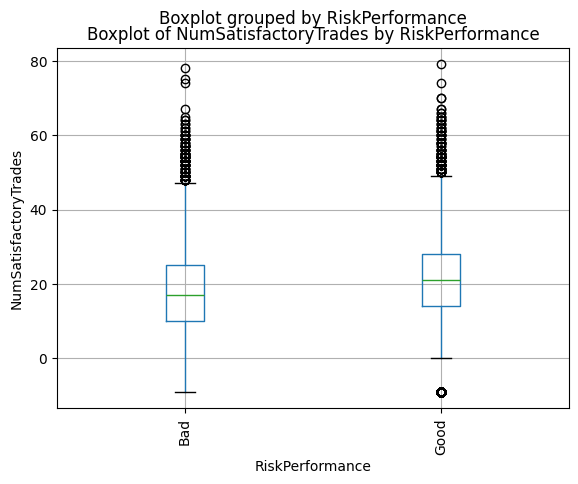

<Figure size 800x600 with 0 Axes>

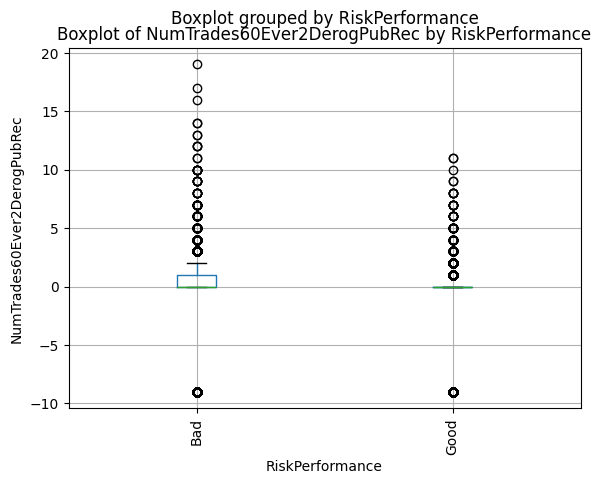

<Figure size 800x600 with 0 Axes>

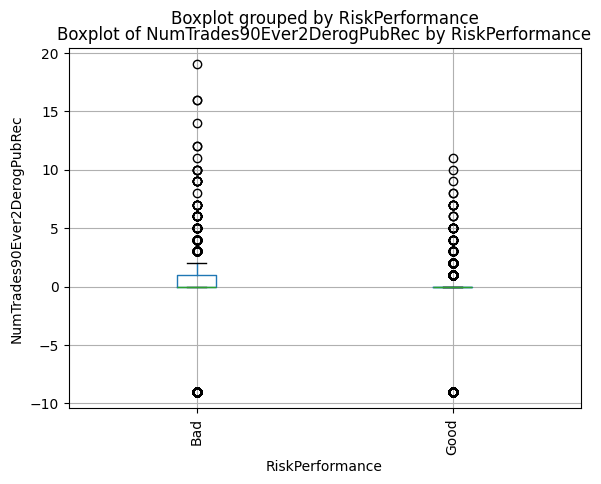

<Figure size 800x600 with 0 Axes>

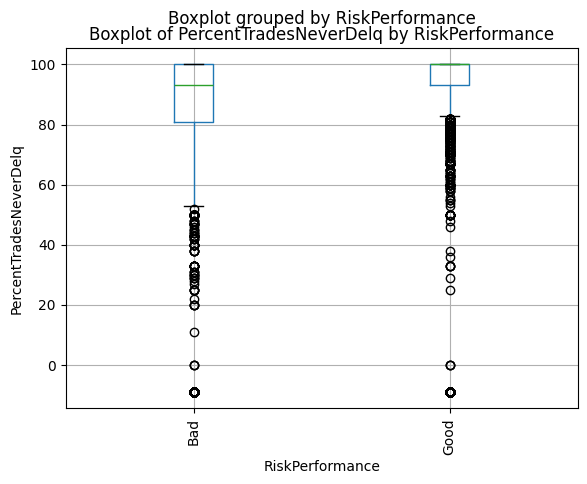

<Figure size 800x600 with 0 Axes>

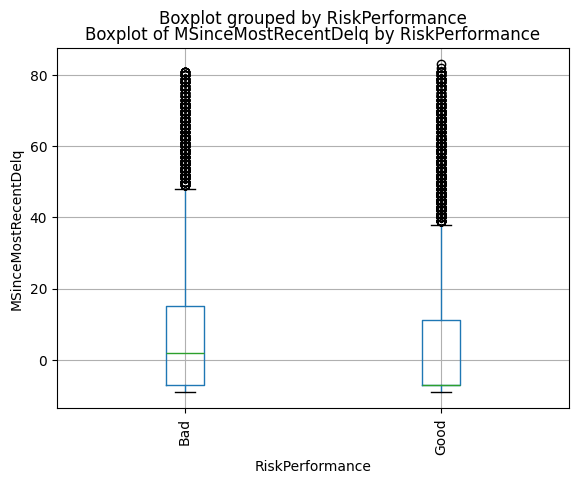

<Figure size 800x600 with 0 Axes>

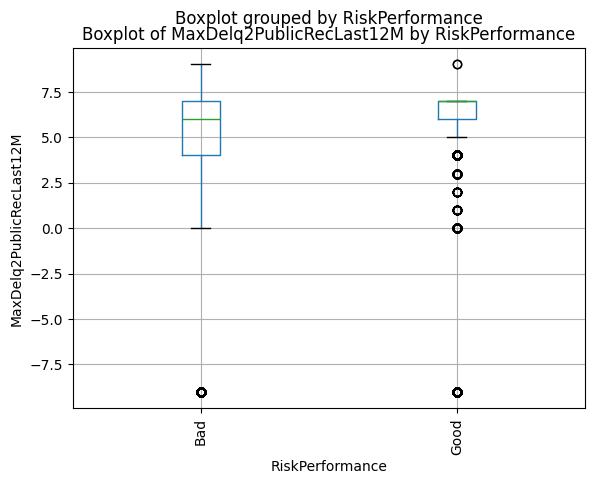

<Figure size 800x600 with 0 Axes>

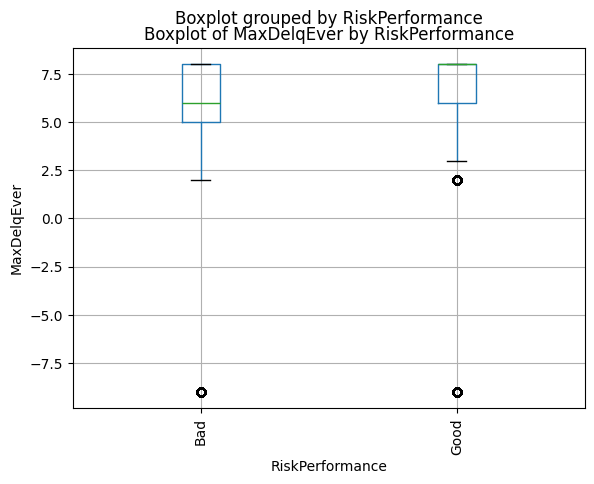

<Figure size 800x600 with 0 Axes>

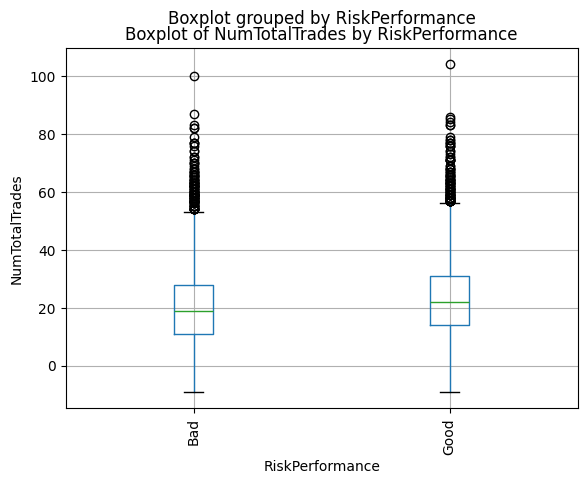

<Figure size 800x600 with 0 Axes>

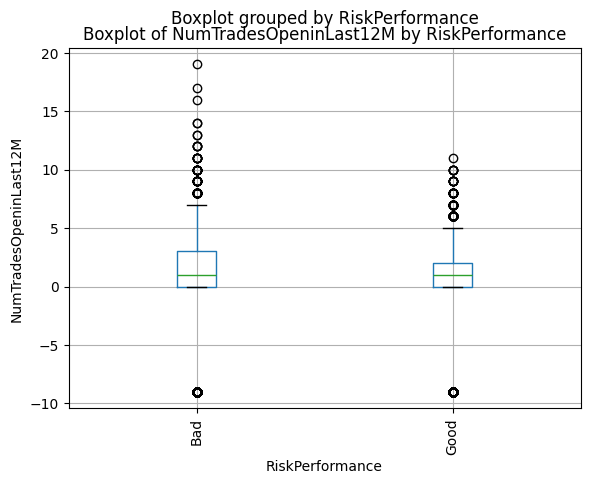

<Figure size 800x600 with 0 Axes>

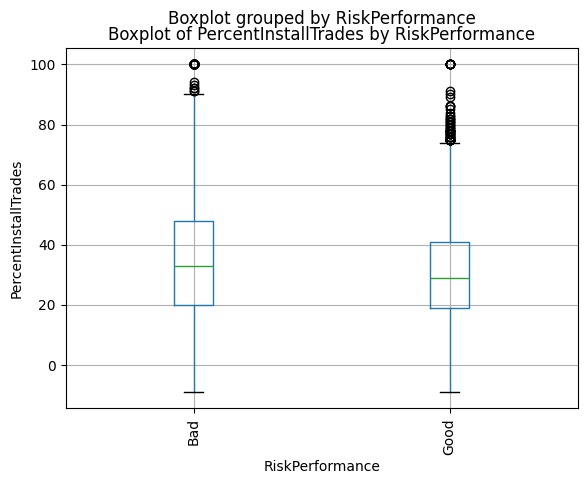

<Figure size 800x600 with 0 Axes>

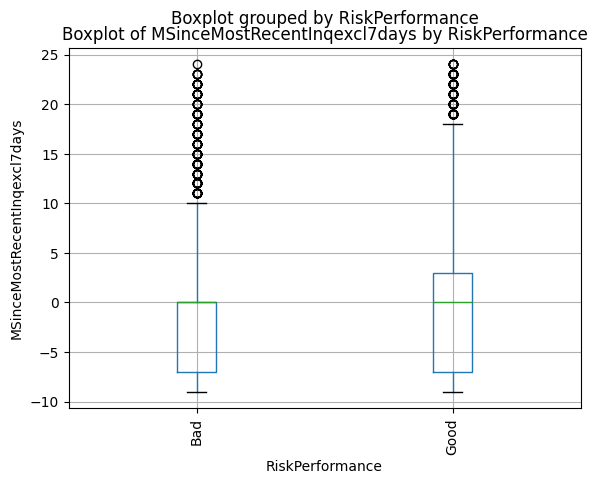

<Figure size 800x600 with 0 Axes>

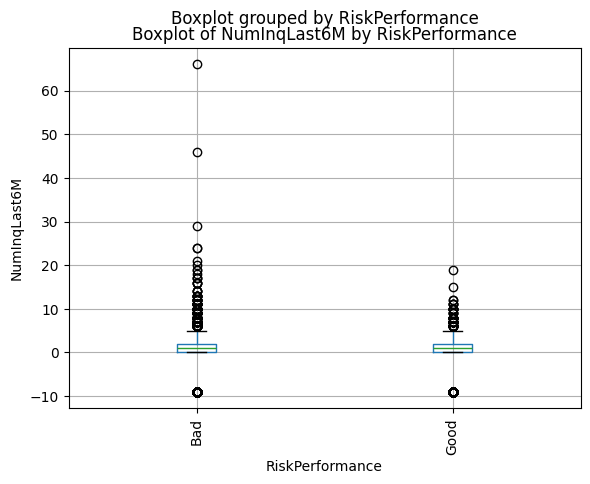

<Figure size 800x600 with 0 Axes>

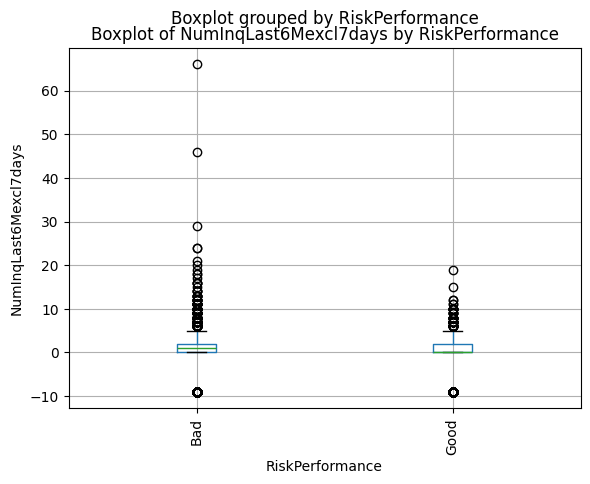

<Figure size 800x600 with 0 Axes>

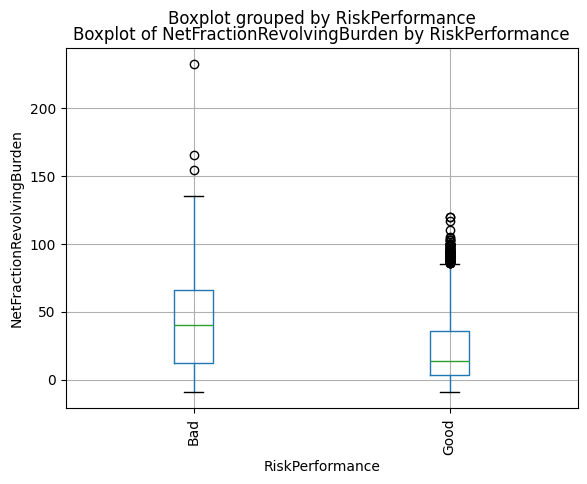

<Figure size 800x600 with 0 Axes>

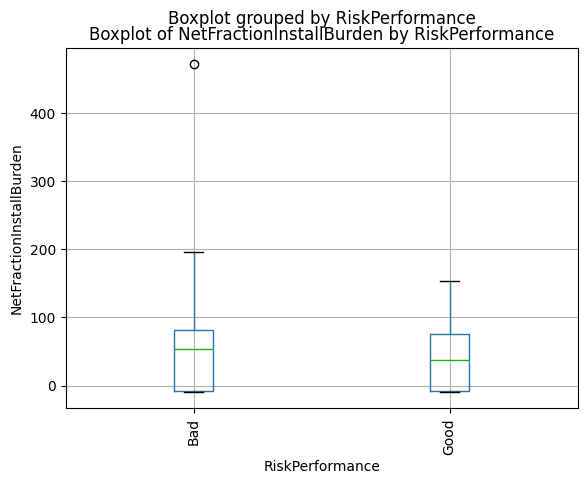

<Figure size 800x600 with 0 Axes>

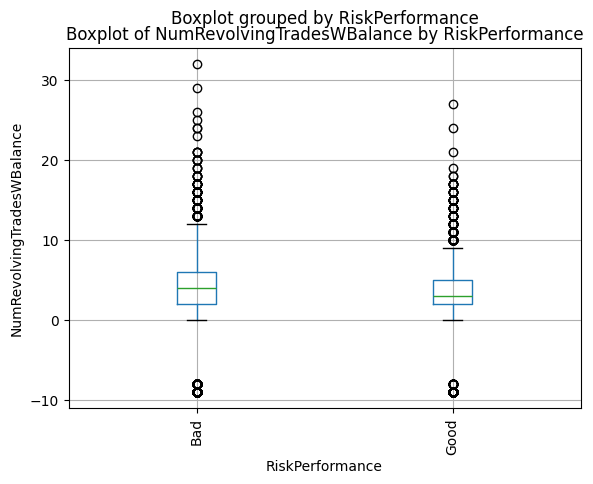

<Figure size 800x600 with 0 Axes>

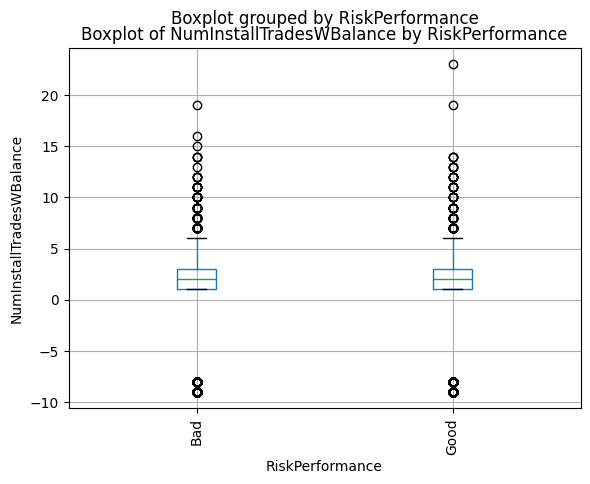

<Figure size 800x600 with 0 Axes>

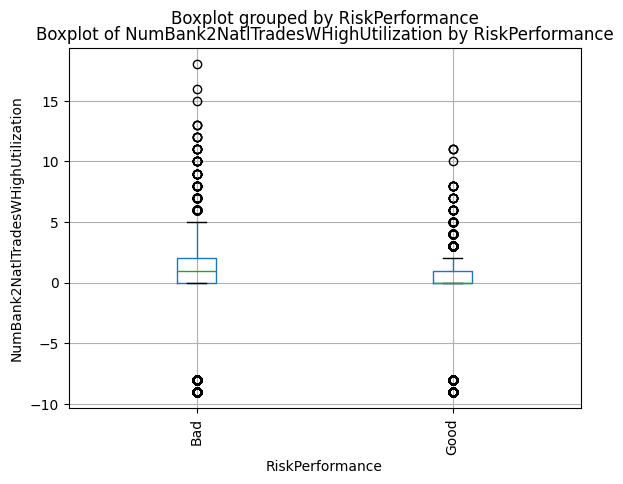

<Figure size 800x600 with 0 Axes>

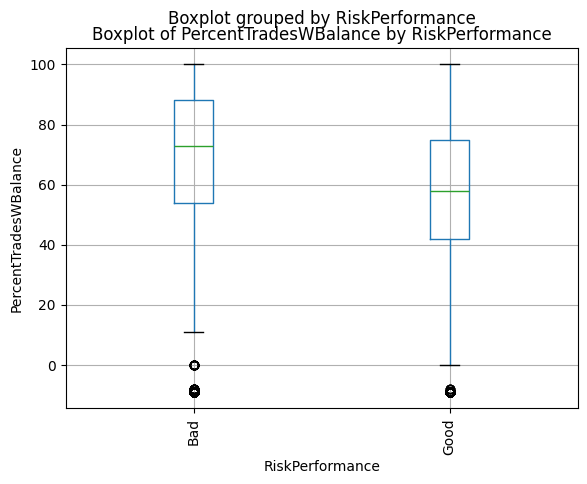

In [9]:
features = data_frame_without_outliers.columns[1:]  # Exclude the first column (RiskPerformance)

# Plot each feature separately
for feature in features:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    data_frame.boxplot(column=feature, by='RiskPerformance')
    plt.ylabel(feature)  # Set the y-axis label as the feature name
    plt.title(f'Boxplot of {feature} by RiskPerformance')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()